# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor


# Read Data

In [6]:
data = pd.read_csv("C:/Users/Farhan/Downloads/Instagram data.csv", encoding = 'latin1')

In [7]:
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

# Whether the dataset contains null values or not

In [8]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [9]:
data = data.dropna()

# Look at the insights of the columns to understand the data type of all the columns:

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


# Instagram Reach Analyzing

- Let’s start with analyzing the reach of my Instagram posts. 
- I will first have a look at the distribution of impressions I have received from home.

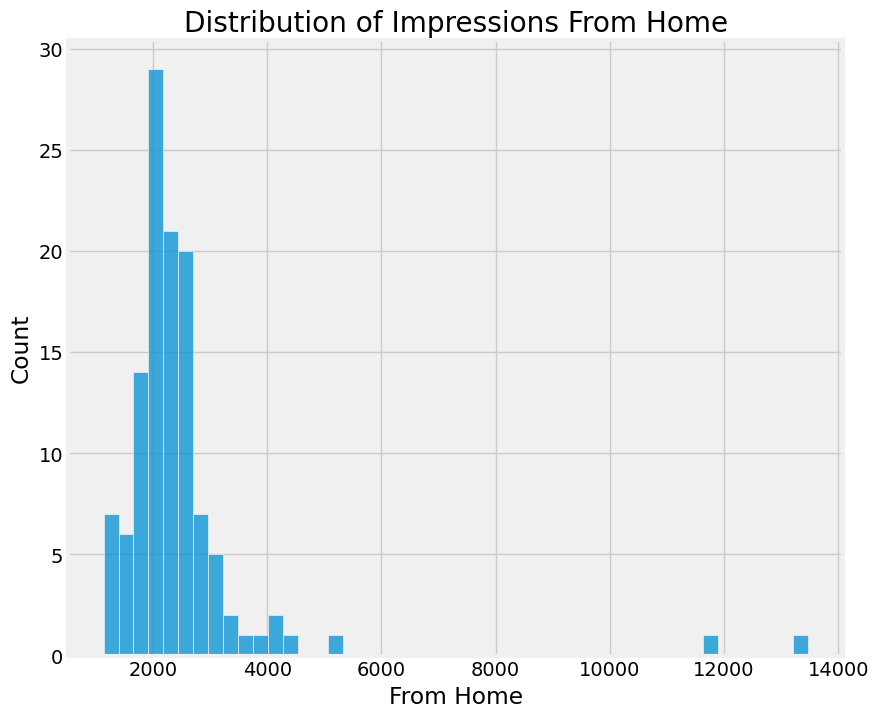

In [11]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
#sns.distplot(data['From Home'])
sns.histplot(data['From Home'])
plt.show()

# Insights



- Looking at the impressions from home, I can say it’s hard to reach all  followers daily. 

- Now let’s have a look at the distribution of the impressions I received from hashtags:

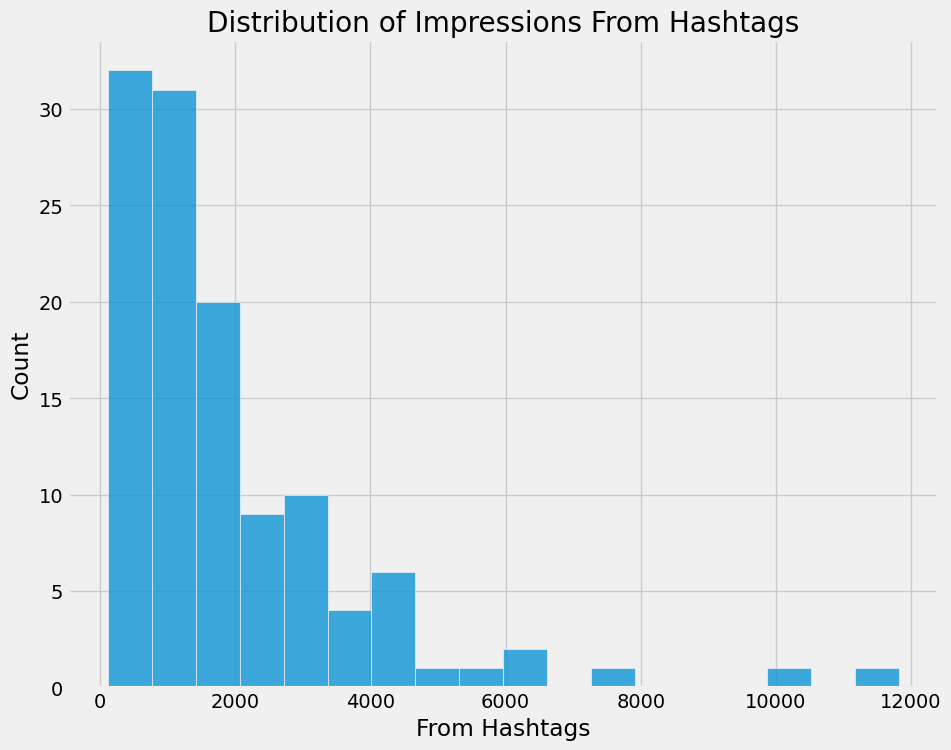

In [12]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
#sns.distplot(data['From Hashtags'])
sns.histplot(data['From Hashtags'])
plt.show()

# Hashtag

- Hashtags are tools we use to categorize our posts on Instagram so that we can reach more people based on the kind of content we are creating. 

- Looking at hashtag impressions shows that not all posts can be reached using hashtags, but many new users can be reached from hashtags. 

- Now let’s have a look at the distribution of impressions I have received from the explore section of Instagram:

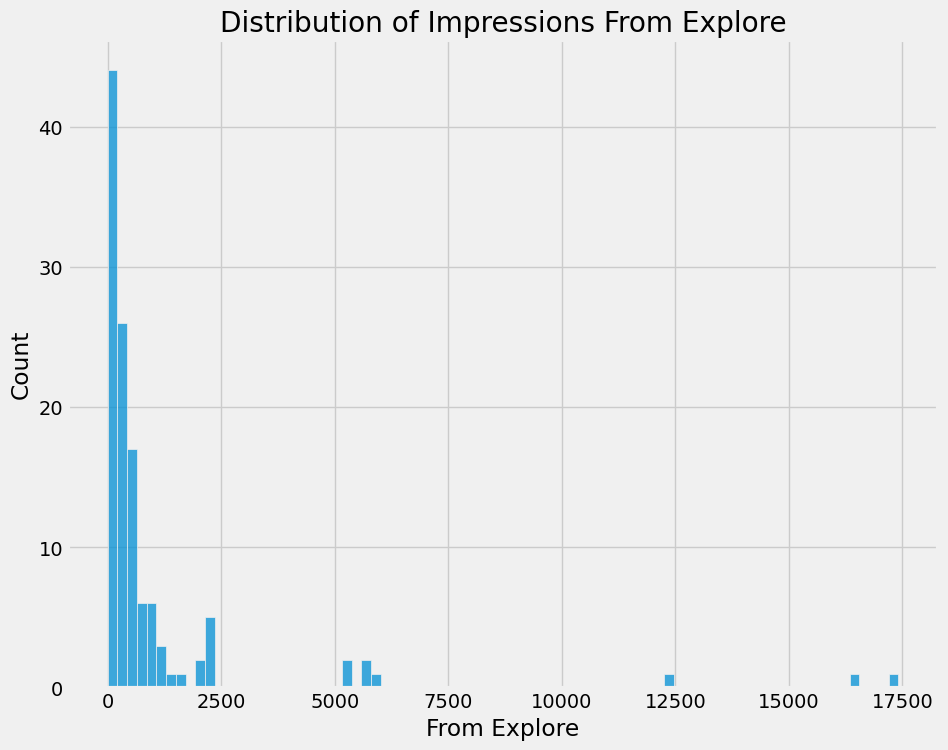

In [13]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
#sns.distplot(data['From Explore'])
sns.histplot(data['From Explore'])
plt.show()

- The explore section of Instagram is the recommendation system of Instagram. It recommends posts to users based on their preferences and interests. 

- By looking at the impressions I have received from the explore section, I can say that Instagram does not recommend our posts much to the users. Some posts have received a good reach from the explore section, but it’s still very low compared to the reach I receive from hashtags.


In [14]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

#### So the above donut plot shows that almost 45 percent of the reach is from my followers, 33.6 percent is from hashtags, 19.2 percent is from the explore section, and 3.05 percent is from other sources.

# Analyzing Content

- Let’s analyze the content of the Instagram posts. The dataset has two columns, namely caption, and hashtags, which will help us understand the kind of content I post on Instagram.

- Let’s create a wordcloud of the caption column to look at the most used words in the caption of my Instagram posts:

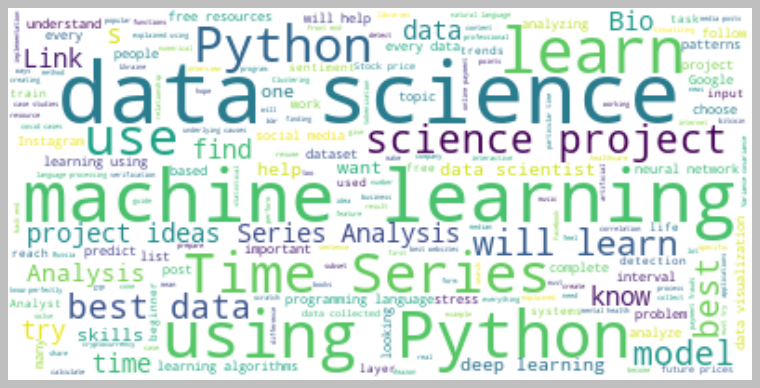

In [15]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- Let’s create a wordcloud of the hashtags column to look at the most used hashtags in my Instagram posts:

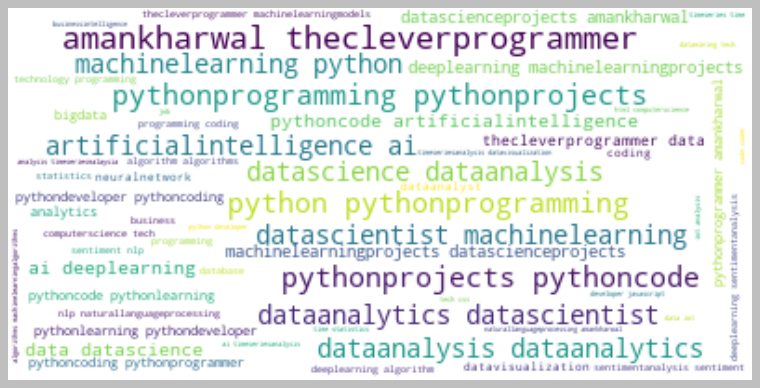

In [16]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Analyzing Relationships

- Let’s analyze relationships to find the most important factors of our Instagram reach. It will also help us in understanding how the Instagram algorithm works.

- Let’s have a look at the relationship between the number of likes and the number of impressions on my Instagram posts:

In [20]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Impressions")
figure.show()

- There is a linear relationship between the number of likes and the reach I got on Instagram. 

- Let’s see the relationship between the number of comments and the number of impressions on my Instagram posts:

In [24]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Comments", size="Comments", trendline="ols", 
                    title = "Relationship Between Comments and Total Impressions")
figure.show()

- It looks like the number of comments we get on a post doesn’t affect its reach. 

- Let’s have a look at the relationship between the number of shares and the number of impressions:

In [25]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Shares", size="Shares", trendline="ols", 
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

- There is a linear relationship between the number of times my post is saved and the reach of my Instagram post. 

- Let’s have a look at the correlation of all the columns with the Impressions column:

In [16]:
correlation = data.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


- So we can say that more likes and saves will help you get more reach on Instagram. 

- The higher number of shares will also help you get more reach, but a low number of shares will not affect your reach either.

# Analyzing Conversion Rate

- In Instagram, conversation rate means how many followers you are getting from the number of profile visits from a post. 

- The formula that you can use to calculate conversion rate is (Follows/Profile Visits) * 100. Now let’s have a look at the conversation rate of my Instagram account:


In [26]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


- So the conversation rate of my Instagram account is 31% which sounds like a very good conversation rate. 

- Let’s have a look at the relationship between the total profile visits and the number of followers gained from all profile visits:

In [27]:
figure = px.scatter(data_frame = data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

#### The relationship between profile visits and followers gained is also linear.